# Analysis Statistics Coronavirus in Iran
###### From Feb 19, 2020 to Jun 20, 2022 ( ۱۳۹۸/۱۱/۳۰ - ۱۴۰۱/۰۳/۳۰)

________________________________________________________________________________________



Coronavirus, started from Wuhan, China in December 2019,
It was spreading throughout the world and become the biggest global pandemic since the Spanish flu in 1918,
which caused millions of deaths.

This notebook will visualize the situation and trend of coronavirus outbreak at a country level.



##### Source of this information:

    Iran: Coronavirus Pandemic Country Profile -From Feb 19, 2020 to Jun 20, 2022
    ("https://ourworldindata.org/coronavirus/country/iran")
    
##### Note: 
    - This is my first exercise to using Python in data analysis.


________________________________________________________________________________________


In [43]:
#--Loading libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [44]:
#--Loading Data And check the general information of the file and especially the type of columns

df = pd.read_csv("Covid-Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         853 non-null    object 
 1   continent                        853 non-null    object 
 2   location                         853 non-null    object 
 3   date                             853 non-null    object 
 4   total_cases                      853 non-null    int64  
 5   new_cases                        853 non-null    int64  
 6   new_cases_smoothed               853 non-null    float64
 7   total_deaths                     853 non-null    int64  
 8   new_deaths                       853 non-null    int64  
 9   new_deaths_smoothed              853 non-null    float64
 10  total_cases_per_million          853 non-null    float64
 11  new_cases_per_million            853 non-null    float64
 12  new_cases_smoothed_per

In [45]:
#--Get the number of rows and columns

df.shape

(853, 17)

In [46]:
#-- returns the number of missing values in the data set.

df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
dtype: int64

In [47]:
#-- Show part of the information

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate
0,IRN,Asia,Iran,2/19/2020,2,2,0.0,2,2,0.0,0.024,0.024,0.0,0.024,0.024,0.0,0.0
1,IRN,Asia,Iran,2/20/2020,5,3,0.0,2,0,0.0,0.059,0.035,0.0,0.024,0.000,0.0,0.0
2,IRN,Asia,Iran,2/21/2020,18,13,0.0,4,2,0.0,0.212,0.153,0.0,0.047,0.024,0.0,0.0
3,IRN,Asia,Iran,2/22/2020,28,10,0.0,5,1,0.0,0.329,0.118,0.0,0.059,0.012,0.0,0.0
4,IRN,Asia,Iran,2/23/2020,43,15,0.0,8,3,0.0,0.506,0.176,0.0,0.094,0.035,0.0,0.0


In [48]:
#-- Separate date information by year, month and day from date, for analysis and future use

df[['date-months','date-days', 'date-years']] = df['date'].str.split("/",expand=True,)

df = df.astype({'date-years':'int'})
df = df.astype({'date-months':'int'})
df = df.astype({'date-days':'int'})

df  

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,date-months,date-days,date-years
0,IRN,Asia,Iran,2/19/2020,2,2,0.000,2,2,0.000,0.024,0.024,0.000,0.024,0.024,0.000,0.0,2,19,2020
1,IRN,Asia,Iran,2/20/2020,5,3,0.000,2,0,0.000,0.059,0.035,0.000,0.024,0.000,0.000,0.0,2,20,2020
2,IRN,Asia,Iran,2/21/2020,18,13,0.000,4,2,0.000,0.212,0.153,0.000,0.047,0.024,0.000,0.0,2,21,2020
3,IRN,Asia,Iran,2/22/2020,28,10,0.000,5,1,0.000,0.329,0.118,0.000,0.059,0.012,0.000,0.0,2,22,2020
4,IRN,Asia,Iran,2/23/2020,43,15,0.000,8,3,0.000,0.506,0.176,0.000,0.094,0.035,0.000,0.0,2,23,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,IRN,Asia,Iran,6/16/2022,7234367,146,149.714,141360,3,2.429,85081.412,1.717,1.761,1662.496,0.035,0.029,0.9,6,16,2022
849,IRN,Asia,Iran,6/17/2022,7234523,156,150.143,141361,1,2.571,85083.247,1.835,1.766,1662.508,0.012,0.030,0.0,6,17,2022
850,IRN,Asia,Iran,6/18/2022,7234597,74,152.714,141363,2,2.000,85084.117,0.870,1.796,1662.532,0.024,0.024,0.0,6,18,2022
851,IRN,Asia,Iran,6/19/2022,7234757,160,152.714,141363,0,1.857,85085.999,1.882,1.796,1662.532,0.000,0.022,0.0,6,19,2022


In [49]:
#-- This method returns description of the data in the DataFrame 

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,date-months,date-days,date-years
count,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,3.102276e+06,8481.814771,8481.225758,73768.191090,165.728019,165.717972,36485.015075,99.752304,99.745380,867.567522,1.949075,1.948971,1.014924,6.182884,15.717468,2020.828839
std,2.698744e+06,9201.994026,8977.856354,49530.237742,143.293999,141.609477,31739.186547,108.222132,105.586107,582.511588,1.685247,1.665436,0.433368,3.331714,8.786120,0.737184
min,2.000000e+00,2.000000,0.000000,2.000000,0.000000,0.000000,0.024000,0.024000,0.000000,0.024000,0.000000,0.000000,0.000000,1.000000,1.000000,2020.000000
25%,4.190430e+05,2182.000000,2218.571000,24118.000000,68.000000,70.429000,4928.250000,25.662000,26.092000,283.645000,0.800000,0.828000,0.820000,3.000000,8.000000,2020.000000
50%,2.286927e+06,5882.000000,5994.286000,67525.000000,125.000000,130.143000,26895.923000,69.177000,70.497000,794.143000,1.470000,1.531000,0.990000,6.000000,16.000000,2021.000000
75%,6.069559e+06,11517.000000,11354.000000,128734.000000,213.000000,212.857000,71382.424000,135.448000,133.531000,1514.005000,2.505000,2.503000,1.110000,9.000000,23.000000,2021.000000
max,7.234988e+06,50228.000000,39795.286000,141366.000000,709.000000,649.571000,85088.716000,590.718000,468.021000,1662.567000,8.338000,7.639000,4.940000,12.000000,31.000000,2022.000000


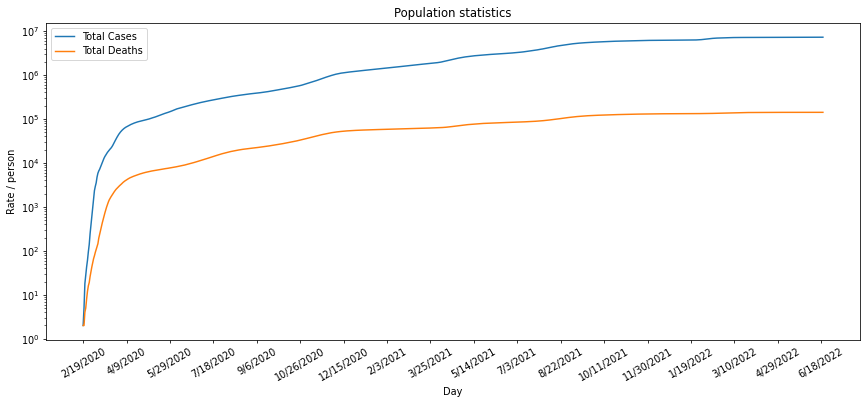

In [50]:
#-- This chart is designed to compare the total patient and death logarithmically

plt.figure(figsize=(15, 6), dpi=70)

plt.plot(df['date'], df['total_cases'],label="Total Cases")
plt.plot(df['date'], df['total_deaths'],label="Total Deaths")


plt.xticks(np.arange(0,852,50))
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.yscale("log")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Rate / person")
plt.title("Population statistics")
plt.show()

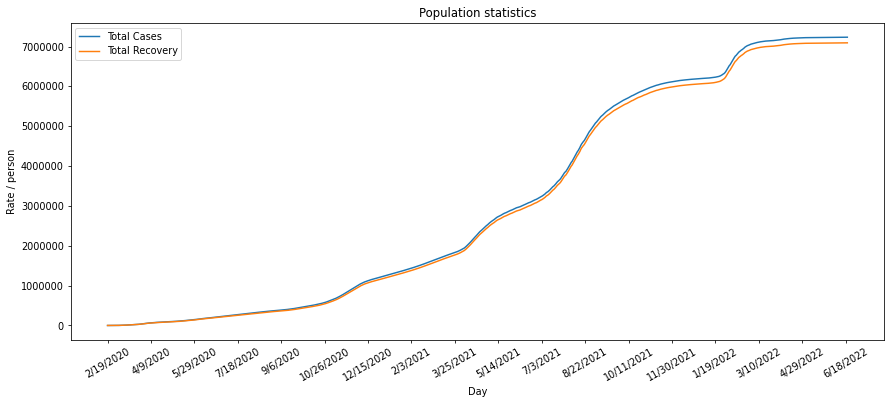

In [51]:
#-- This chart is Cumulative confirmed COVID-19 cases

plt.figure(figsize=(15, 6), dpi=70)

plt.plot(df['date'], df['total_cases'],label="Total Cases")
plt.plot(df['date'], df['total_cases']-df['total_deaths'],label="Total Recovery")

plt.xticks(np.arange(0,852,50))
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.xlabel("Day")
plt.ylabel("Rate / person")
plt.title("Population statistics")
plt.show()

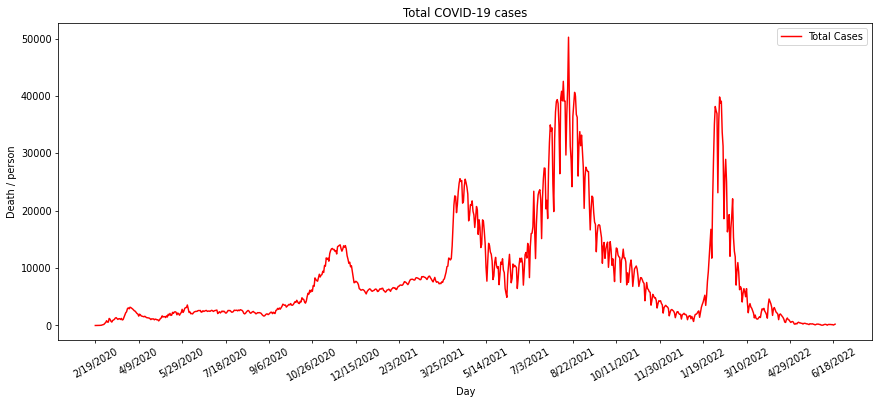

In [52]:
#-- This chart is Daily new confirmed COVID-19 cases

plt.figure(figsize=(15, 6), dpi=70)

plt.plot(df['date'], df['new_cases'],label="Total Cases", color="Red")
plt.xticks(np.arange(0,852,50))
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.xlabel("Day")
plt.ylabel("Death / person")
plt.title("Total COVID-19 cases")
plt.show()

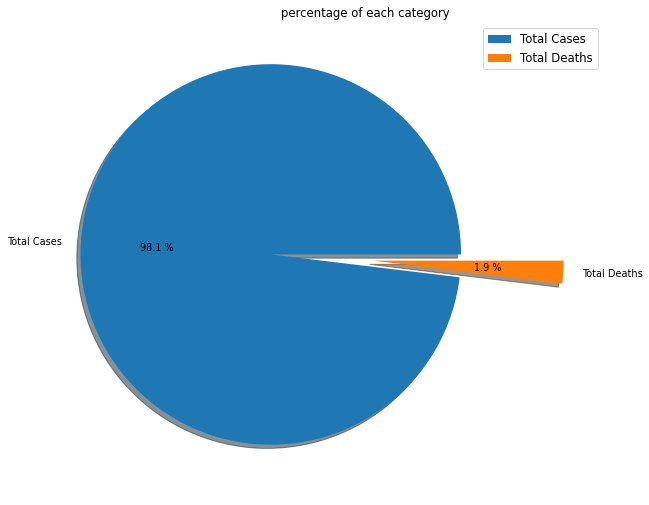

In [53]:
#-- This chart is for displaying and comparing the percentage of each category

plt.figure(figsize=(10, 9), dpi=70)

x = [df['total_cases'].max(),df['total_deaths'].max()]
labels = ["Total Cases", "Total Deaths"]

myexplode = [0.5, 0.04]
plt.pie(x, labels = labels, explode = myexplode, shadow = True, autopct='%1.1f %%')
plt.legend(labels, loc='best', bbox_to_anchor=(1, 1), fontsize=12)
plt.title("percentage of each category")
plt.show() 

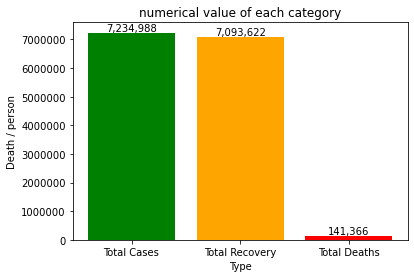

In [54]:
#-- This chart is for displaying and comparing the numerical value of each category

Column = [1,2,3]
height = [df['total_cases'].max(),df['total_cases'].max()-df['total_deaths'].max(),df['total_deaths'].max()]  
tick_label = ['Total Cases', 'Total Recovery', 'Total Deaths']
  
bars = plt.bar(Column, height, tick_label = tick_label,
        width = 0.8, color = ['Green', 'orange', 'red'])

plt.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
plt.xlabel("Type")
plt.ylabel("Death / person")
plt.title("numerical value of each category")
plt.ticklabel_format(style='plain', axis='y')
plt.show()